# **Power Law with Exponential Cutoff Notebook**

# Imports & Google Drive Setup

In [ ]:
!pip install powerlaw mpmath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import powerlaw
import mpmath
import math
from scipy.optimize import minimize, curve_fit
from scipy.integrate import quad
from scipy.special import zeta
from scipy.stats import norm

from google.colab import drive
from pathlib import Path
import os

In [ ]:
drive.mount('/content/drive')
!ls
PATH = "/content/drive/MyDrive/Data_Science/Thesis/SONIA_data"
os.chdir(PATH)

Mounted at /content/drive
drive  sample_data


In [ ]:
pwd

'/content/drive/MyDrive/Data_Science/Thesis/SONIA_data'

# Exploration Plots



In [ ]:
def power_expcutoff(x_list, a, l, c=int(1)):
  c = int(c)
  pl = c*[x**-a for x in x_list]
  ec = np.exp([x*-l for x in x_list])
  pl_ec = pl*ec
  return pl_ec

In [ ]:
x = list(range(1, 50))
# y = power_expcutoff(x, k, l)
y1 = power_expcutoff(x, 0.1, 1)
y2 = power_expcutoff(x, 0.5, 1)
y3 = power_expcutoff(x, 1, 1)
y4 = power_expcutoff(x, 1, 0.1)
y5 = power_expcutoff(x, 1, 0.5)
y6 = power_expcutoff(x, 1, 1)
y7 = power_expcutoff(x, 0.1, 0.1)
y8 = power_expcutoff(x, 0.3, 0.3)
y9 = power_expcutoff(x, 0.5, 0.5)

Text(0.5, 1.0, 'a=0.5, l=0.5')

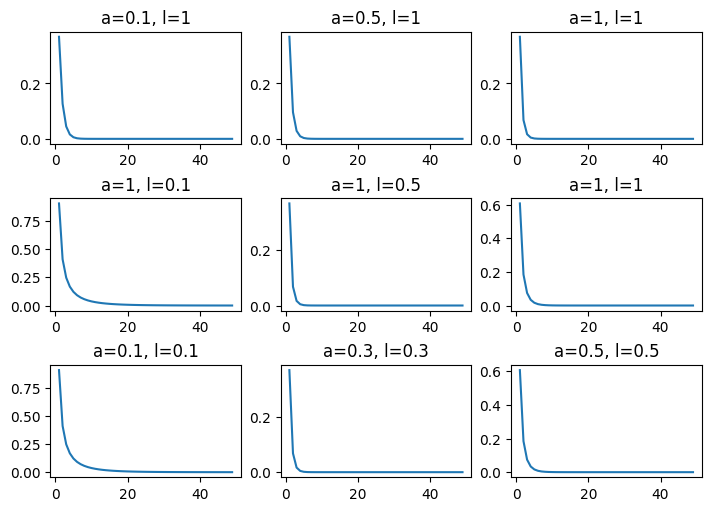

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (7, 5), constrained_layout = True) # sharex=True, sharey=True
# y = x^-a * e^()

# Row 1: Changing a
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('a=0.1, l=1')
axs[0, 1].set_title('a=0.5, l=1')
axs[0, 1].plot(x, y2)
axs[0, 2].set_title('a=1, l=1')
axs[0, 2].plot(x, y3)

# Row 2: Changing l
axs[1, 0].plot(x, y4)
axs[1, 0].set_title('a=1, l=0.1')
axs[1, 1].plot(x, y6)
axs[1, 1].set_title('a=1, l=0.5')
axs[1, 2].plot(x, y5)
axs[1, 2].set_title('a=1, l=1')

# Row 3: Changing a & l
axs[2, 0].plot(x, y4)
axs[2, 0].set_title('a=0.1, l=0.1')
axs[2, 1].plot(x, y6)
axs[2, 1].set_title('a=0.3, l=0.3')
axs[2, 2].plot(x, y5)
axs[2, 2].set_title('a=0.5, l=0.5')


In [ ]:
# Power Law, no exp cutoff
x_ex = x = list(range(1, 50))
y_ex = power_expcutoff(x_ex, 2.5, 0)
log_x_ex = np.log(x_ex)
log_y_ex = np.log(y_ex)

In [ ]:
PATH

'/content/drive/MyDrive/Data_Science/Thesis/SONIA_data'

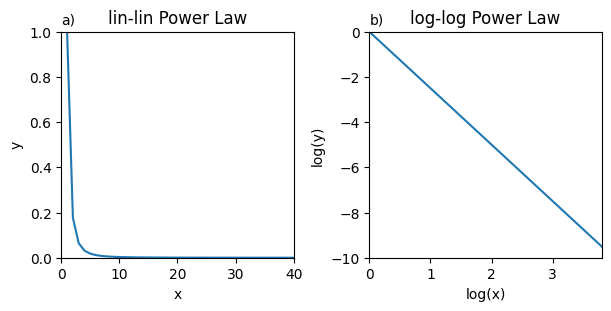

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (6, 3), constrained_layout = True) # sharex=True, sharey=True
axs[0].plot(x_ex, y_ex)
axs[0].set(xlabel='x')
axs[0].set(ylabel='y')
axs[0].set_xlim(0, 40)
axs[0].set_ylim(0, 1)
axs[0].set_title('lin-lin Power Law')
axs[0].set_title('a)', loc='left', fontsize='medium')

axs[1].plot(log_x_ex, log_y_ex)
axs[1].set(xlabel='log(x)')
axs[1].set(ylabel='log(y)')
axs[1].set_xlim(0, 3.8)
axs[1].set_ylim(-10, 0)
axs[1].set_title('log-log Power Law')
axs[1].set_title('b)', loc='left', fontsize='medium')

plt.savefig('power_law.png', dpi=300)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Fitting Power Law to Surrogate Data

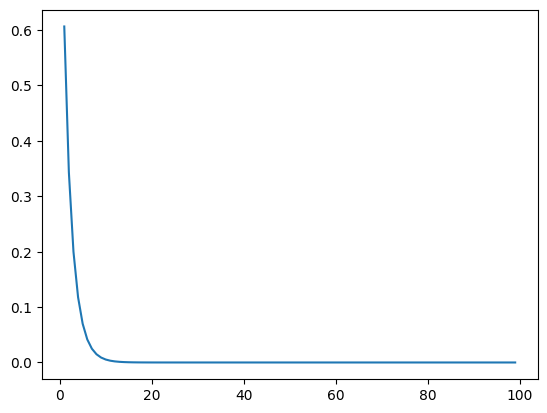

In [ ]:
x_data = list(range(1, 100))
a = 0.1
b = 0.5
y_data = power_expcutoff(x_data, a, b)
plt.plot(x_data,y_data)

In [ ]:
# data = [5, 4, ... ]
results = powerlaw.Fit(y_data)
print(results.truncated_power_law.parameter1) # power law  parameter (alpha)
print(results.truncated_power_law.parameter2) # exponential cut-off parameter (beta)
print(results.xmin)
print(results.supported_distributions)

Calculating best minimal value for power law fit
1.000000021990222
1.400485066502522
2.0084435339017648e-22
{'power_law': <class 'powerlaw.Power_Law'>, 'lognormal': <class 'powerlaw.Lognormal'>, 'exponential': <class 'powerlaw.Exponential'>, 'truncated_power_law': <class 'powerlaw.Truncated_Power_Law'>, 'stretched_exponential': <class 'powerlaw.Stretched_Exponential'>, 'lognormal_positive': <class 'powerlaw.Lognormal_Positive'>}


In [ ]:
R,p = results.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R, p

Assuming nested distributions


(-5.157517405001998, 3.708144902248023e-14)

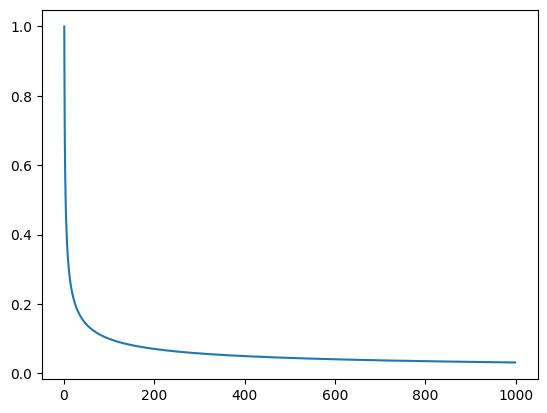

In [ ]:
x_data = list(range(1, 1000))
a = 0.5
b = 0
y_data = power_expcutoff(x_data, a, b)
plt.plot(x_data,y_data)

In [ ]:
results = powerlaw.Fit(y_data)
print(results.truncated_power_law.parameter1) # power law  parameter (alpha)
print(results.truncated_power_law.parameter2) # exponential cut-off parameter (beta)

Calculating best minimal value for power law fit
2.9617112382443596
0.41378107236720874


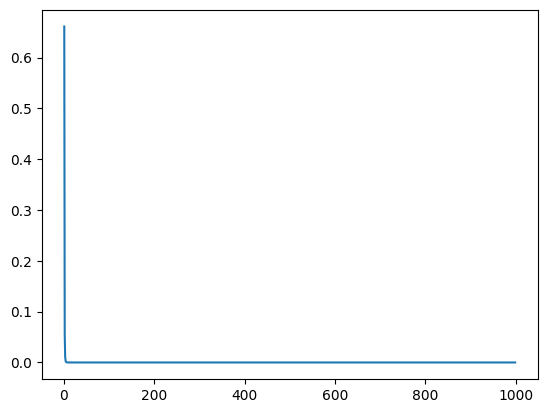

In [ ]:
y_pred = power_expcutoff(x_data, 2.9617112382443596, 0.41378107236720874)
plt.plot(x_data,y_pred)

## Using curve_fit

Wow! It runs so much better when it has an idea of what starting points to use! Surprise, surprise. Whoohoo

In [ ]:
sol = curve_fit(power_expcutoff, x_data, y_data, maxfev=2000, p0=np.asarray([0.49,0.01]))

In [ ]:
sol[0]

array([ 5.0000000e-01, -7.0612599e-12])

# Data

## Sonia & TCRdb

In [ ]:
# reading in the clonotype data
clone_tcr = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_tcr.tsv', sep='\t', header=None)
clone_tcr.columns = ['x', 'y']
clone_sonia1 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_1all.tsv', sep='\t', header=None)
clone_sonia1.columns = ['x', 'y']
clone_sonia2 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_2all.tsv', sep='\t', header=None)
clone_sonia2.columns = ['x', 'y']

In [ ]:
PATH

'/content/drive/MyDrive/Data_Science/Thesis/SONIA_data'

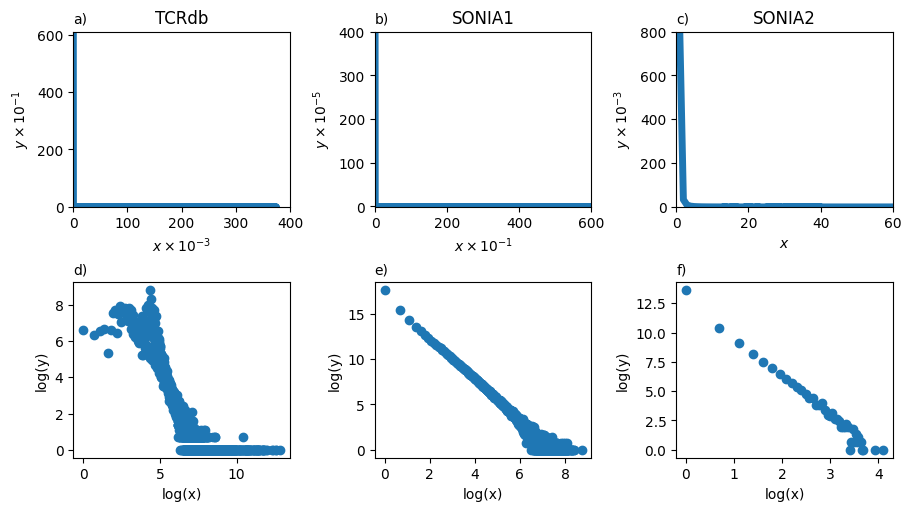

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (9, 5), constrained_layout = True) # sharex=True, sharey=True
# y = x^-a * e^()

# Row 1:
axs[0, 0].plot(clone_tcr['x']*10**-3, clone_tcr['y']*10**-1, linewidth=5)
axs[0, 0].set_title('TCRdb')
axs[0, 0].set(xlabel=r'$x\times10^{-3}$', ylabel=r'$y\times10^{-1}$')
axs[0, 0].set_xlim(0, 400)
axs[0, 0].set_ylim(0, 610)
axs[0, 0].set_title('a)', loc='left', fontsize='medium')

axs[0, 1].set_title('SONIA1')
axs[0, 1].plot(clone_sonia1['x']*10**-1, clone_sonia1['y']*10**-5, linewidth=5)
axs[0, 1].set(xlabel=r'$x\times10^{-1}$', ylabel=r'$y\times10^{-5}$')
axs[0, 1].set_xlim(-1, 600)
axs[0, 1].set_ylim(-1, 4e2)
axs[0, 1].set_title('b)', loc='left', fontsize='medium')

axs[0, 2].set_title('SONIA2')
axs[0, 2].plot(clone_sonia2['x'], clone_sonia2['y']*10**-3, linewidth=5)
axs[0, 2].set(xlabel=r'$x$', ylabel=r'$y\times10^{-3}$')
axs[0, 2].set_xlim(0, 60)
axs[0, 2].set_ylim(0, 800)
axs[0, 2].set_title('c)', loc='left', fontsize='medium')

# Row 2:
axs[1, 0].scatter(np.log(clone_tcr['x']), np.log(clone_tcr['y']))
axs[1, 0].set(xlabel='log(x)', ylabel='log(y)')
axs[1, 0].set_title('d)', loc='left', fontsize='medium')
axs[1, 1].scatter(np.log(clone_sonia1['x']), np.log(clone_sonia1['y']))
axs[1, 1].set(xlabel='log(x)', ylabel='log(y)')
axs[1, 1].set_title('e)', loc='left', fontsize='medium')
axs[1, 2].scatter(np.log(clone_sonia2['x']), np.log(clone_sonia2['y']))
axs[1, 2].set(xlabel='log(x)', ylabel='log(y)')
axs[1, 2].set_title('f)', loc='left', fontsize='medium')

plt.savefig('power_law_tcr_sonia.png', dpi=300)

## Uniform Distribution 1

In [ ]:
# reading in the clonotype data
clone_unif_10_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_10_000.tsv', sep='\t', header=None)
clone_unif_10_000.columns = ['x', 'y']
clone_unif_100_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_100_000.tsv', sep='\t', header=None)
clone_unif_100_000.columns = ['x', 'y']
clone_unif_1_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_1_000_000.tsv', sep='\t', header=None)
clone_unif_1_000_000.columns = ['x', 'y']
clone_unif_3_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif_3_000_000.tsv', sep='\t', header=None)
clone_unif_3_000_000.columns = ['x', 'y']

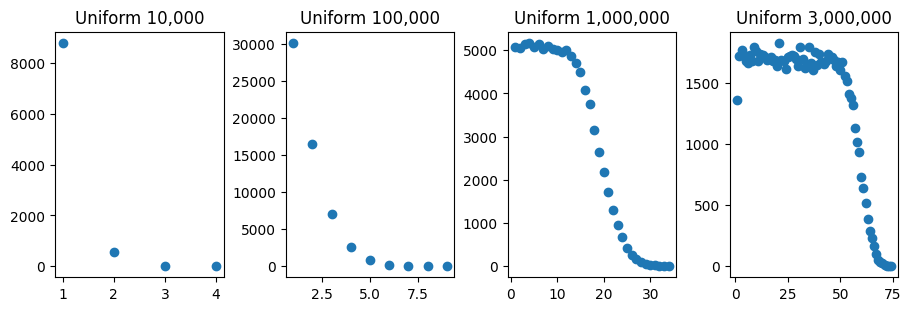

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (9, 3), constrained_layout = True) # sharex=True, sharey=True
# y = x^-a * e^()

# Row 1:
axs[0].scatter(clone_unif_10_000['x'], clone_unif_10_000['y'])
axs[0].set_title('Uniform 10,000')
axs[1].set_title('Uniform 100,000')
axs[1].scatter(clone_unif_100_000['x'], clone_unif_100_000['y'])
axs[2].set_title('Uniform 1,000,000')
axs[2].scatter(clone_unif_1_000_000['x'], clone_unif_1_000_000['y'])
axs[3].set_title('Uniform 3,000,000')
axs[3].scatter(clone_unif_3_000_000['x'], clone_unif_3_000_000['y'])

## Mixed Poisson Distribution 1

In [ ]:
# reading in the clonotype data
clone_mp_10_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_10000.tsv', sep='\t', header=None)
clone_mp_10_000.columns = ['x', 'y']
clone_mp_100_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_100000.tsv', sep='\t', header=None)
clone_mp_100_000.columns = ['x', 'y']
clone_mp_300_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp_300000.tsv', sep='\t', header=None)
clone_mp_300_000.columns = ['x', 'y']

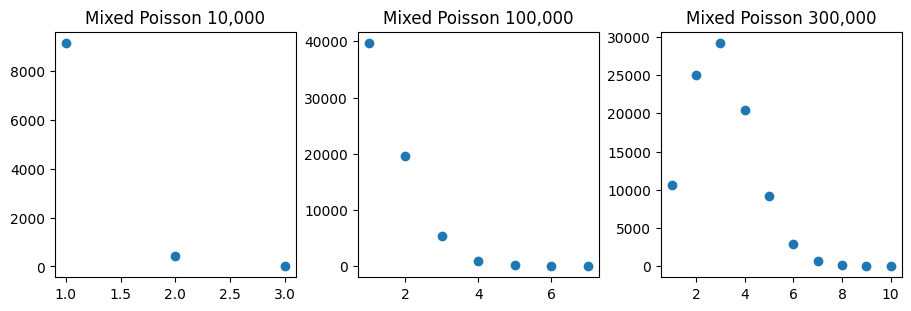

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (9, 3), constrained_layout = True) # sharex=True, sharey=True
# y = x^-a * e^()

# Row 1:
axs[0].scatter(clone_mp_10_000['x'], clone_mp_10_000['y'])
axs[0].set_title('Mixed Poisson 10,000')
axs[1].set_title('Mixed Poisson 100,000')
axs[1].scatter(clone_mp_100_000['x'], clone_mp_100_000['y'])
axs[2].set_title('Mixed Poisson 300,000')
axs[2].scatter(clone_mp_300_000['x'], clone_mp_300_000['y'])

## Uniform Distribution 2

In [ ]:
# reading in the clonotype data
clone_unif2_10_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_10_000.tsv', sep='\t', header=None)
clone_unif2_10_000.columns = ['x', 'y']
clone_unif2_100_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_100_000.tsv', sep='\t', header=None)
clone_unif2_100_000.columns = ['x', 'y']
clone_unif2_1_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_1_000_000.tsv', sep='\t', header=None)
clone_unif2_1_000_000.columns = ['x', 'y']
clone_unif2_3_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_3_000_000.tsv', sep='\t', header=None)
clone_unif2_3_000_000.columns = ['x', 'y']
clone_unif2_10_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_10_000_000.tsv', sep='\t', header=None)
clone_unif2_10_000_000.columns = ['x', 'y']
clone_unif2_20_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_20_000_000.tsv', sep='\t', header=None)
clone_unif2_20_000_000.columns = ['x', 'y']
clone_unif2_30_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_30_000_000.tsv', sep='\t', header=None)
clone_unif2_30_000_000.columns = ['x', 'y']
clone_unif2_40_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_unif1_40_000_000.tsv', sep='\t', header=None)
clone_unif2_40_000_000.columns = ['x', 'y']

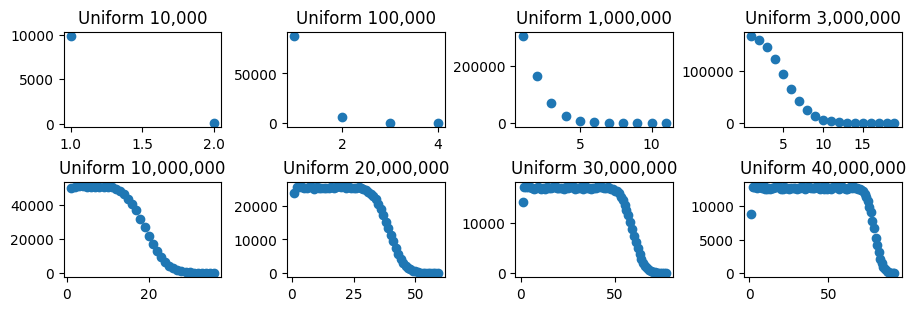

In [ ]:
fig, axs = plt.subplots(2, 4, figsize = (9, 3), constrained_layout = True) # sharex=True, sharey=True
# y = x^-a * e^()

# Row 1:
axs[0, 0].scatter(clone_unif2_10_000['x'], clone_unif2_10_000['y'])
axs[0, 0].set_title('Uniform 10,000')
axs[0, 1].set_title('Uniform 100,000')
axs[0, 1].scatter(clone_unif2_100_000['x'], clone_unif2_100_000['y'])
axs[0, 2].set_title('Uniform 1,000,000')
axs[0, 2].scatter(clone_unif2_1_000_000['x'], clone_unif2_1_000_000['y'])
axs[0, 3].set_title('Uniform 3,000,000')
axs[0, 3].scatter(clone_unif2_3_000_000['x'], clone_unif2_3_000_000['y'])
axs[1, 0].set_title('Uniform 10,000,000')
axs[1, 0].scatter(clone_unif2_10_000_000['x'], clone_unif2_10_000_000['y'])
axs[1, 1].set_title('Uniform 20,000,000')
axs[1, 1].scatter(clone_unif2_20_000_000['x'], clone_unif2_20_000_000['y'])
axs[1, 2].set_title('Uniform 30,000,000')
axs[1, 2].scatter(clone_unif2_30_000_000['x'], clone_unif2_30_000_000['y'])
axs[1, 3].set_title('Uniform 40,000,000')
axs[1, 3].scatter(clone_unif2_40_000_000['x'], clone_unif2_40_000_000['y'])

## Mixed Poisson Distribution 2

In [ ]:
# reading in the clonotype data
clone_mp2_10_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_10_000.tsv', sep='\t', header=None)
clone_mp2_10_000.columns = ['x', 'y']
clone_mp2_100_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_100_000.tsv', sep='\t', header=None)
clone_mp2_100_000.columns = ['x', 'y']
clone_mp2_300_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_300_000.tsv', sep='\t', header=None)
clone_mp2_300_000.columns = ['x', 'y']
clone_mp2_1_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_1_000_000.tsv', sep='\t', header=None)
clone_mp2_1_000_000.columns = ['x', 'y']
clone_mp2_2_000_000 = pd.read_csv('/content/drive/MyDrive/Data Science/Thesis/Recon/df_fill_in_mp1_2_000_000.tsv', sep='\t', header=None)
clone_mp2_2_000_000.columns = ['x', 'y']


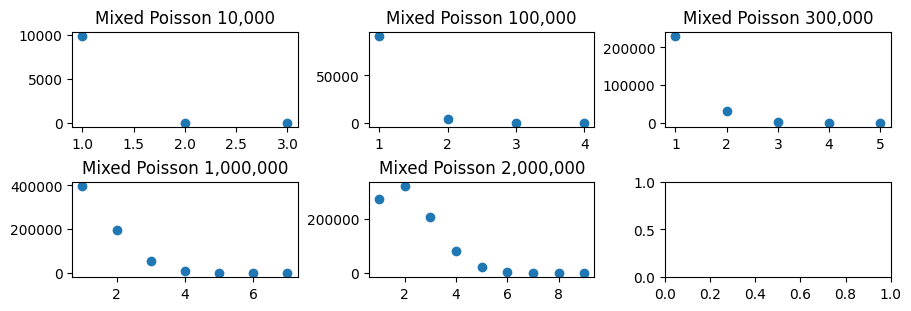

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (9, 3), constrained_layout = True) # sharex=True, sharey=True
# y = x^-a * e^()

# Row 1:
axs[0, 0].scatter(clone_mp2_10_000['x'], clone_mp2_10_000['y'])
axs[0, 0].set_title('Mixed Poisson 10,000')
axs[0, 1].set_title('Mixed Poisson 100,000')
axs[0, 1].scatter(clone_mp2_100_000['x'], clone_mp2_100_000['y'])
axs[0, 2].set_title('Mixed Poisson 300,000')
axs[0, 2].scatter(clone_mp2_300_000['x'], clone_mp2_300_000['y'])

axs[1, 0].set_title('Mixed Poisson 1,000,000')
axs[1, 0].scatter(clone_mp2_1_000_000['x'], clone_mp2_1_000_000['y'])
axs[1, 1].set_title('Mixed Poisson 2,000,000')
axs[1, 1].scatter(clone_mp2_2_000_000['x'], clone_mp2_2_000_000['y'])

# MLE Power Law Simple

In [ ]:
import numpy as np
from scipy.optimize import minimize

def power_law_likelihood(params, data):
    alpha = params[0]
    n = len(data)
    x = data['x']
    y = data['y']
    if alpha < 1e-6: alpha = 1e-6
    # neg_log_like = -n * np.log(alpha) - (alpha + 1) * np.sum(np.log(x))
    neg_log_like = -n * np.log(alpha) - (alpha + 1) * np.sum(np.log(x)) + np.sum(y * np.log(x)) # xmin=1
    # -∑ [log(α - 1) - log(x_min) - α * log(x_i / x_min)]
    # return log_likelihood
    return neg_log_like

def estimate_unseen_clones(sample_df):
    clone_sizes = sample_df['x'].values

    neg_log_likelihood = lambda params: -power_law_likelihood(params, sample_df)
    initial_alpha = 2.0

    # Minimize the negative log-likelihood
    result = minimize(neg_log_likelihood, x0=[initial_alpha], method='Nelder-Mead')
    estimated_alpha = result.x[0]
    print('log-likelihood: ', result.fun)
    num_unseen_clones = len(clone_sizes) * (min(clone_sizes) ** estimated_alpha) / (estimated_alpha - 1)

    return num_unseen_clones


## Sonia & TCRdb

In [ ]:
data = clone_tcr
print(sum(data['y']))
s = estimate_unseen_clones(data)
print('s: ', s)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

142770
log-likelihood:  -583138.7329806873
s:  -1788.3333333333305
79.78949329359178
142849.7894932936


In [ ]:
data = clone_sonia1
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

52152541
log-likelihood:  -11545508.651396403
41467.697588126226
52194008.69758812


In [ ]:
data = clone_sonia2
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

852972
log-likelihood:  -48472.16603085021
23693.666666666704
876665.6666666667


## Unif 1

In [ ]:
data = clone_unif_10_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

9382
log-likelihood:  -472.1582787095389
2165.076923076926
11547.076923076926


In [ ]:
data = clone_unif_100_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

57295
log-likelihood:  -24551.462790653935
6740.588235294127
64035.588235294126


In [ ]:
data = clone_unif_1_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

96324
log-likelihood:  -201576.80696405543
3283.7727272727325
99607.77272727274


In [ ]:
data = clone_unif_3_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

99540
log-likelihood:  -312794.04383130354
1588.4042553191516
101128.40425531915


## MP1

In [ ]:
data = clone_mp_10_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

9564
log-likelihood:  -338.1270741951683
2732.5714285714316
12296.571428571431


In [ ]:
data = clone_mp_100_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

65949
log-likelihood:  -21274.42396257726
9651.07317073172
75600.07317073172


In [ ]:
data = clone_mp_300_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

98289
log-likelihood:  -99723.35031104555
10530.9642857143
108819.9642857143


## Unif 2

In [ ]:
data = clone_unif2_10_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

9927
log-likelihood:  -77.53761742309743
3722.625000000004
13649.625000000004


In [ ]:
data = clone_unif2_100_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

93765
log-likelihood:  -4283.653731201515
21638.07692307695
115403.07692307695


In [ ]:
data = clone_unif2_1_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

573485
log-likelihood:  -244017.339567312
56408.360655737786
629893.3606557378


In [ ]:
data = clone_unif2_3_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

845046
log-likelihood:  -896631.4371754508
50200.7524752476
895246.7524752476


In [ ]:
data = clone_unif2_10_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

962767
log-likelihood:  -2013206.5746208748
31057.00000000005
993824.0


In [ ]:
data = clone_unif2_20_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

987570
log-likelihood:  -2708654.4800413237
19685.78073089704
1007255.7807308971


In [ ]:
data = clone_unif2_30_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

994971
log-likelihood:  -3120292.8825267204
15268.097186700792
1010239.0971867008


In [ ]:
data = clone_unif2_40_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

998360
log-likelihood:  -3413409.900607418
12854.42060085839
1011214.4206008584


## MP2

In [ ]:
data = clone_mp2_10_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

9951
log-likelihood:  -73.04361811543906
2843.1428571428605
12794.14285714286


In [ ]:
data = clone_mp2_100_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

95756
log-likelihood:  -2964.051583021673
22097.53846153849
117853.5384615385


In [ ]:
data = clone_mp2_300_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

263668
log-likelihood:  -24453.20820588098
51032.51612903232
314700.5161290323


In [ ]:
data = clone_mp2_1_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

659465
log-likelihood:  -211926.02336865896
96507.07317073183
755972.0731707318


In [ ]:
data = clone_mp2_2_000_000
print(sum(data['y']))
s = estimate_unseen_clones(data)
print(sum(data['y'])/(1-s))
print(sum(data['y'])/(1-s) + sum(data['y']))

906533
log-likelihood:  -607113.0592526878
106650.94117647075
1013183.9411764707
